imports

In [1]:
from typing import *
from langgraph.graph import StateGraph

from IPython.display import Image,display

an agent-state can be thought of as a shared data-structure that holds information or context of entire application that all nodes and their tools will be participating in.

In [2]:
class AgentState(TypedDict):
    message: str

# state schema

def greeting_node(state: AgentState) -> AgentState:
    """
    Docstring for greeting_node
    
    :param state: Description
    :type state: AgentState
    :return: Description
    :rtype: AgentState

    simple node that adds a greeting message to the state
    """

    state ['message'] = "hey "+ state['message'] + ", how is your day going?"
    return state

def complimenting_node(state: AgentState) -> AgentState:
    """
    Docstring for complimenting_node
    
    :param state: Description
    :type state: AgentState
    :return: Description
    :rtype: AgentState

    simple node that compliments after greeting to the state
    """

    state ['message'] = "you're doing a really good job! there mate, " + state['message']
    return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node("greeter",greeting_node)
graph.add_node("complimenter", complimenting_node)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

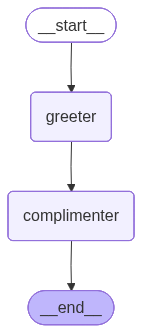

In [4]:
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"message": "Pranav"})

result["message"]

"you're doing a really good job! there mate, hey Pranav, how is your day going?"